<a href="https://colab.research.google.com/github/alesaccoia/IULM_DDM2324_Notebooks/blob/main/20_MonteCarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulazione Monte Carlo per un centro estetico

Cominciamo l'esercizio simulando il calcolo per un singolo utente

In [9]:
import random

def simulate_iteration():
    # Costi e ricavi fissi
    costo_trattamento = 50
    offerta_groupon = 20
    ricavo_per_vendita = offerta_groupon / 2
    costo_fisso_e_variabile = costo_trattamento * 0.5

    # Generazione dei valori stocastici con i nuovi intervalli
    percentuale_nuovi_clienti = random.uniform(0.65, 0.85)
    percentuale_clienti_spendono_di_piu = random.uniform(0.30, 0.42)
    importo_extra = random.uniform(10, 50)
    percentuale_clienti_che_ritornano = random.uniform(0.10, 0.30)
    profitto_annuo_per_cliente = random.uniform(50, 250)
    retention_rate = random.uniform(0.55, 0.85)

    # Calcolo del guadagno/perdita per la vendita con Groupon
    guadagno_groupon = ricavo_per_vendita - costo_fisso_e_variabile
    guadagno_extra = percentuale_clienti_spendono_di_piu * importo_extra

    # Guadagno totale per cliente acquisito con Groupon
    guadagno_totale_per_cliente = guadagno_groupon + guadagno_extra

    # Calcolo del guadagno a lungo termine dai clienti che tornano
    guadagno_da_clienti_che_ritornano = percentuale_clienti_che_ritornano * profitto_annuo_per_cliente * retention_rate

    # Guadagno totale
    guadagno_totale = guadagno_totale_per_cliente + guadagno_da_clienti_che_ritornano

    return guadagno_totale



Vediamo alcune simulazioni

In [10]:
for x in range(1,11):
  risultato = simulate_iteration()
  print(f"Risultato {x}: {risultato}")

Risultato 1: 16.171681923313002
Risultato 2: 2.5563545228369655
Risultato 3: 9.035340546679201
Risultato 4: 6.367921058348687
Risultato 5: 22.470576335615696
Risultato 6: 31.35940311855883
Risultato 7: 27.53290376265662
Risultato 8: 13.370213142847703
Risultato 9: 34.586420415906595
Risultato 10: 12.506197121498811


In [11]:
# Eseguiamo la simulazione Monte Carlo per 10.000 iterazioni
numero_iterazioni = 10000
risultati = [simulate_iteration() for _ in range(numero_iterazioni)]

# Calcoliamo alcune statistiche di base sui risultati
media_guadagno = sum(risultati) / numero_iterazioni
percentile_25 = sorted(risultati)[int(0.25 * numero_iterazioni)]
percentile_50 = sorted(risultati)[int(0.50 * numero_iterazioni)]
percentile_75 = sorted(risultati)[int(0.75 * numero_iterazioni)]

media_guadagno, percentile_25, percentile_50, percentile_75

(17.054981265552204, 8.382084479852235, 15.438709343518411, 24.36602216545316)

# Distribuzione dei guadagni per cliente acquisito tramite Groupon

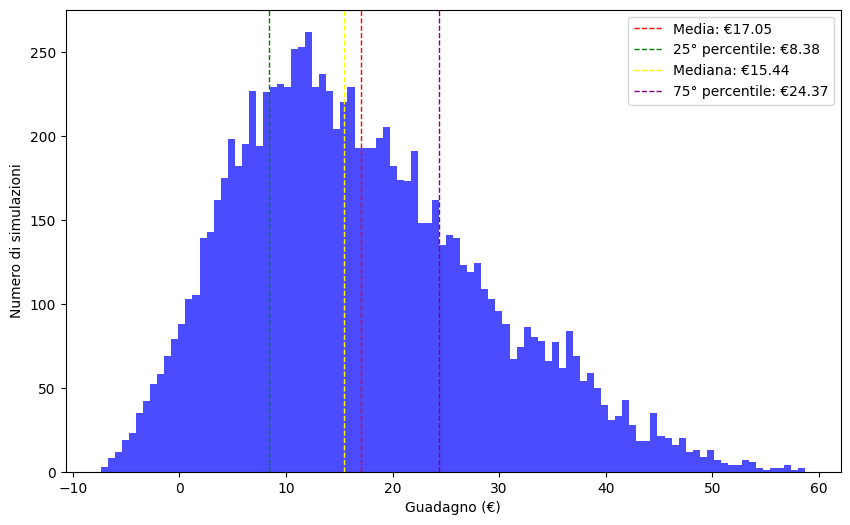

In [15]:
import matplotlib.pyplot as plt

# Creazione dell'istogramma
plt.figure(figsize=(10, 6))
plt.hist(risultati, bins=100, color='blue', alpha=0.7)
plt.xlabel('Guadagno (€)')
plt.ylabel('Numero di simulazioni')
plt.grid(False)
plt.axvline(media_guadagno, color='red', linestyle='dashed', linewidth=1, label=f'Media: €{media_guadagno:.2f}')
plt.axvline(percentile_25, color='green', linestyle='dashed', linewidth=1, label=f'25° percentile: €{percentile_25:.2f}')
plt.axvline(percentile_50, color='yellow', linestyle='dashed', linewidth=1, label=f'Mediana: €{percentile_50:.2f}')
plt.axvline(percentile_75, color='purple', linestyle='dashed', linewidth=1, label=f'75° percentile: €{percentile_75:.2f}')
plt.legend()
plt.show()


# Probabilitá di superare il break even

In [13]:
# Calcolo della probabilità che la prima versione di parametri dia un guadagno superiore a 0
probabilita_guadagno_superiore_0 = sum(1 for risultato in risultati if risultato > 0) / numero_iterazioni
print(probabilita_guadagno_superiore_0)


0.9593
